In [1]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

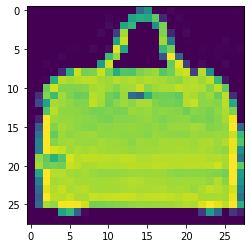

In [ ]:
plt.imshow(train_images[220])
train_images.shape



In [ ]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
train_data=np.array(train_images)
test_data=np.array(test_images)

train_data=train_data.astype('float32')
test_data=test_data.astype('float32')

train_data/=255
test_data/=255


In [ ]:
train_labels=keras.utils.to_categorical(train_labels,num_classes=10)
test_labels=keras.utils.to_categorical(test_labels,num_classes=10)

In [ ]:
# you must flat your data before using them .... 
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 1.2203 - val_accuracy: 0.8868
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 1.3019 - val_accuracy: 0.8784
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 1.2543 - val_accuracy: 0.8857
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 1.2387 - val_accuracy: 0.8840
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 1.2464 - val_accuracy: 0.8855
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 1.2986 - val_accuracy: 0.8864
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 1.2846 - val_accuracy: 0.8846
Epoch 

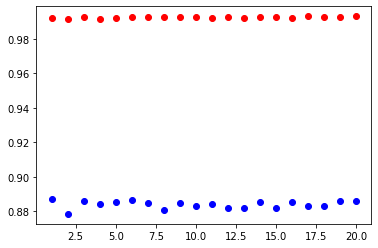

In [ ]:
x=range(1,21)
#y=history.history['loss']
y=history.history['accuracy']
plt.scatter(x,y,color='r')

x=range(1,21)
#y=history.history['val_loss']
y=history.history['val_accuracy']
plt.scatter(x,y,color='b')